# LAPTOP PRICE PREDICTION DATA SET

🙋‍♀️Author : Sonia firdous

📧Email : soniafirdous1985@gmail.com

The data was collected from the following [link](https://drive.google.com/file/d/1CLVhKpF15Zy4ZXm9QDn6HDBoaw0GSL7m/view?usp=drive_link)

`Description:`

Data collected from the source has following description:

A simple yet challenging project, to predict laptop prices based on certain factors like CPU, GPU, RAM, Memory, ScreenResolution, and TypeName. The dataset is small yet its complexity arises because many features are interdependent (e.g., high RAM usually comes with better CPUs or GPUs).

`Purpose of Analysis:`

Understand the dataset through visualization & cleanup (if required), identify the most important features affecting price, and build predictive models that can estimate the price of a laptop given its specifications.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [117]:
df=pd.read_csv("/content/laptop_data.csv")

# EXPLORING DATA

In [118]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [119]:
df.shape

(1303, 12)

In [120]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# DUPLICATED VALUES

In [122]:
df.duplicated().sum()

np.int64(0)

# MISSING VALUES

In [123]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [124]:

df["Weight"] = df["Weight"].str.replace("kg", "").astype("float32")

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int64(1), object(8)
memory usage: 117.2+ KB


# EDA

# PRICE
more laptops with low/budget prices

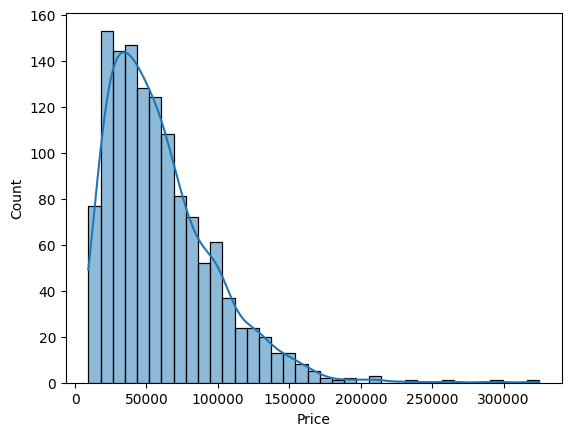

In [126]:
sns.histplot(df['Price'], kde=True)
plt.show()


#UNNAMED:0

In [127]:
df.drop(columns=['Unnamed: 0'],inplace=True)

# COMPANY

more laptops are from Lenovo,Dell,HP

<Axes: xlabel='Company'>

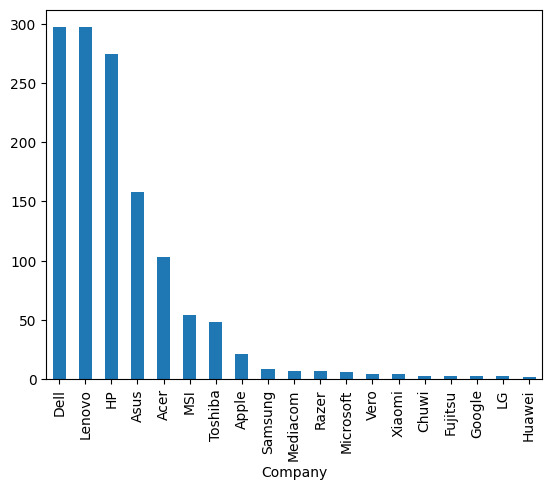

In [128]:
df["Company"].value_counts().plot(kind="bar")

average price for each brand(company)

* brandname matter for price

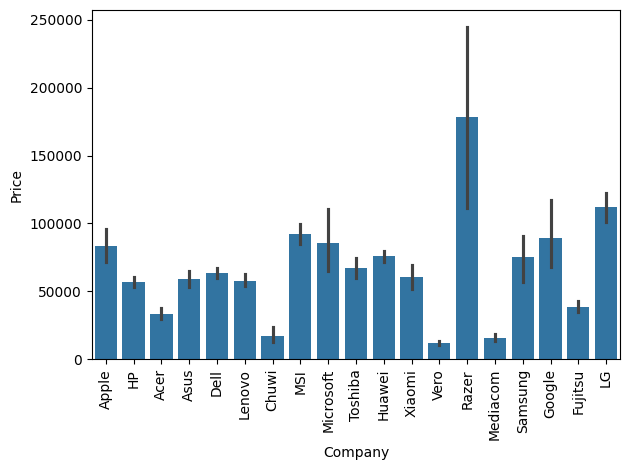

In [129]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()


# TYPE NAME

most laptop type is notebook

In [130]:
df["TypeName"].value_counts()


,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


<Axes: xlabel='TypeName'>

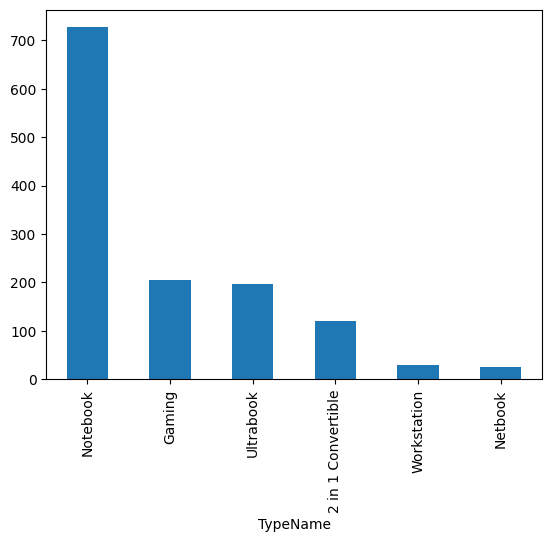

In [131]:
df["TypeName"].value_counts().plot(kind="bar")

Typename vs Price

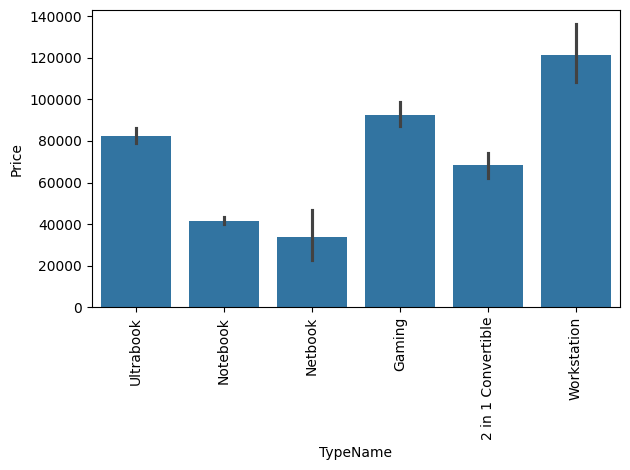

In [132]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()


# INCHES

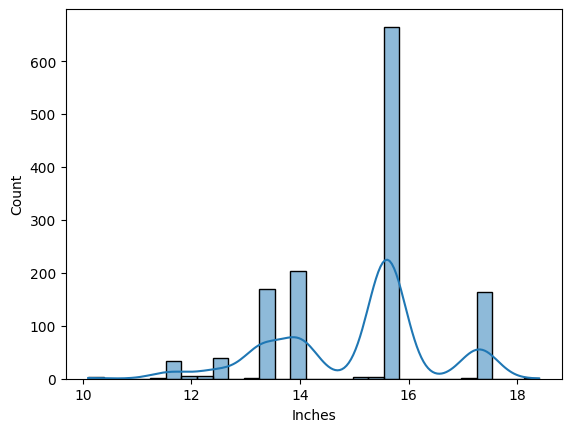

In [133]:
sns.histplot(df['Inches'], kde=True)
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

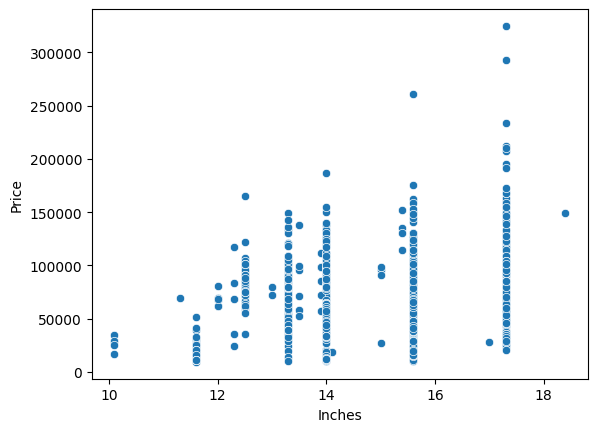

In [134]:
sns.scatterplot(x=df["Inches"],y=df["Price"])

# SCREEN RESOLUTION

In [135]:
df["ScreenResolution"].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [136]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [137]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0


<Axes: xlabel='Touchscreen'>

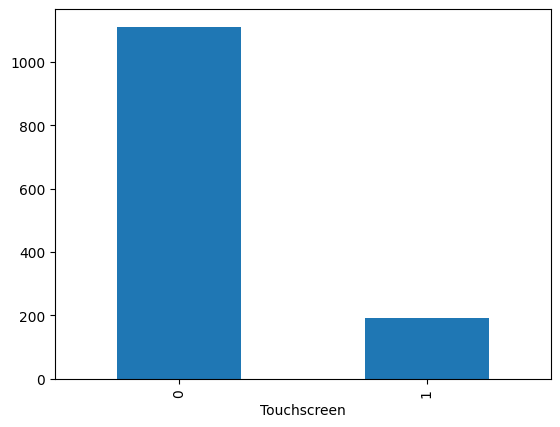

In [138]:
df["Touchscreen"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

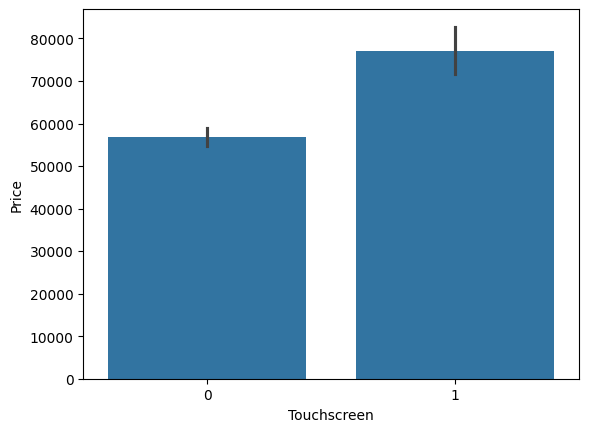

In [139]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [140]:
df["IPS"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [141]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0


<Axes: xlabel='IPS'>

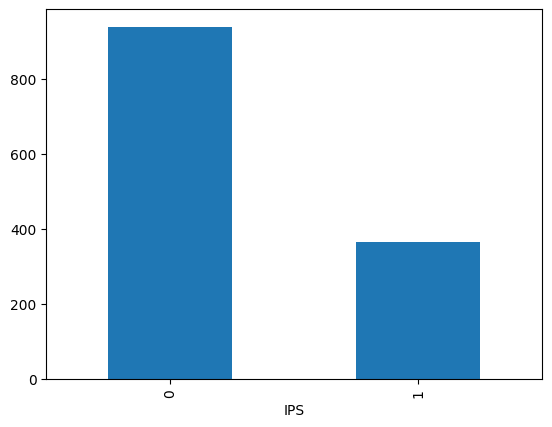

In [142]:
df["IPS"].value_counts().plot(kind="bar")

<Axes: xlabel='IPS', ylabel='Price'>

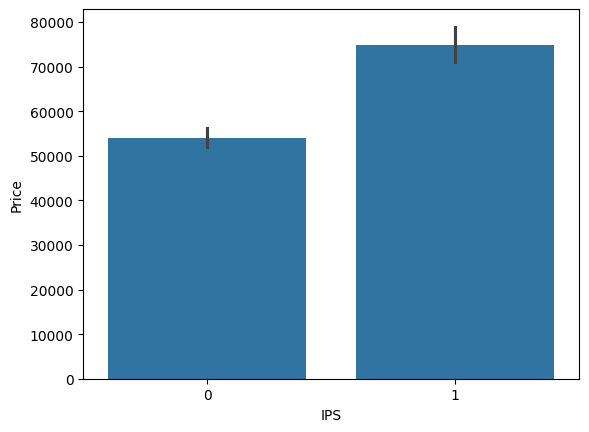

In [143]:
sns.barplot(x=df["IPS"],y=df["Price"])

In [144]:
df["ScreenResolution"]

,ScreenResolution
0,IPS Panel Retina Display 2560x1600
1,1440x900
2,Full HD 1920x1080
3,IPS Panel Retina Display 2880x1800
4,IPS Panel Retina Display 2560x1600
...,...
1298,IPS Panel Full HD / Touchscreen 1920x1080
1299,IPS Panel Quad HD+ / Touchscreen 3200x1800
1300,1366x768
1301,1366x768


In [145]:
df["ScreenResolution"].str.split("x")

,ScreenResolution
0,"[IPS Panel Retina Display 2560, 1600]"
1,"[1440, 900]"
2,"[Full HD 1920, 1080]"
3,"[IPS Panel Retina Display 2880, 1800]"
4,"[IPS Panel Retina Display 2560, 1600]"
...,...
1298,"[IPS Panel Full HD / Touchscreen 1920, 1080]"
1299,"[IPS Panel Quad HD+ / Touchscreen 3200, 1800]"
1300,"[1366, 768]"
1301,"[1366, 768]"


In [146]:
new=df["ScreenResolution"].str.split("x",n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [147]:
df["x_resolution"]=new[0]
df["y_resolution"]=new[1]

In [148]:
df["x_resolution"]

,x_resolution
0,IPS Panel Retina Display 2560
1,1440
2,Full HD 1920
3,IPS Panel Retina Display 2880
4,IPS Panel Retina Display 2560
...,...
1298,IPS Panel Full HD / Touchscreen 1920
1299,IPS Panel Quad HD+ / Touchscreen 3200
1300,1366
1301,1366


In [149]:
df["x_resolution"]=df["x_resolution"].str.replace(',',"").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])


In [150]:
df['y_resolution']

,y_resolution
0,1600
1,900
2,1080
3,1800
4,1600
...,...
1298,1080
1299,1800
1300,768
1301,768


In [151]:
df["x_resolution"]=df["x_resolution"].astype("int")
df["y_resolution"]=df["y_resolution"].astype("int")


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_resolution      1303 non-null   int64  
 14  y_resolution      1303 non-null   int64  
dtypes: float32(1), float64(2), int64(4), object(8)
memory usage: 147.7+ KB


pixels per inch (PPI), which is a measure of screen sharpness.

The general formula is:
$$
PPI = \frac{\sqrt{(\text{Width}_{px}^2 + \text{Height}_{px}^2)}}{\text{Diagonal}_{in}}
$$

	* ​we will use x_reolution column and y_resolution column and inch column to find ppi



In [153]:
df["PPI"]=(((df['x_resolution']**2)+(df["y_resolution"]**2))**0.5/df["Inches"]).astype("float")

In [154]:
df['PPI']

,PPI
0,226.983005
1,127.677940
2,141.211998
3,220.534624
4,226.983005
...,...
1298,157.350512
1299,276.053530
1300,111.935204
1301,100.454670


In [155]:
df.drop(columns=["ScreenResolution","x_resolution","y_resolution","Inches"],inplace=True)

In [156]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


#CPU

In [157]:
df["Cpu"].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [158]:
df["Cpu_name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))
df["Cpu_name"]

,Cpu_name
0,Intel Core i5
1,Intel Core i5
2,Intel Core i5
3,Intel Core i7
4,Intel Core i5
...,...
1298,Intel Core i7
1299,Intel Core i7
1300,Intel Celeron Dual
1301,Intel Core i7


In [159]:
df["Cpu_name"].value_counts()

,count
Cpu_name,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
Intel Celeron Dual,80
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
AMD A6-Series 9220,8
Intel Celeron Quad,8


In [160]:
def fetch_processor(text):
  if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
     return text
  else:
      if text.split()[0] =="Intel":
        return "other Intel Processor"
      else:
        return "AMD Processor"

In [161]:
df["Cpu_brand"]=df["Cpu_name"].apply(fetch_processor)

In [162]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_brand'>

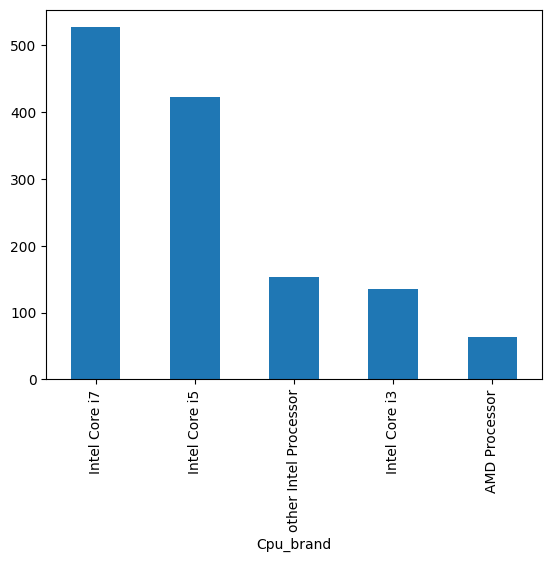

In [163]:
df["Cpu_brand"].value_counts().plot(kind="bar")

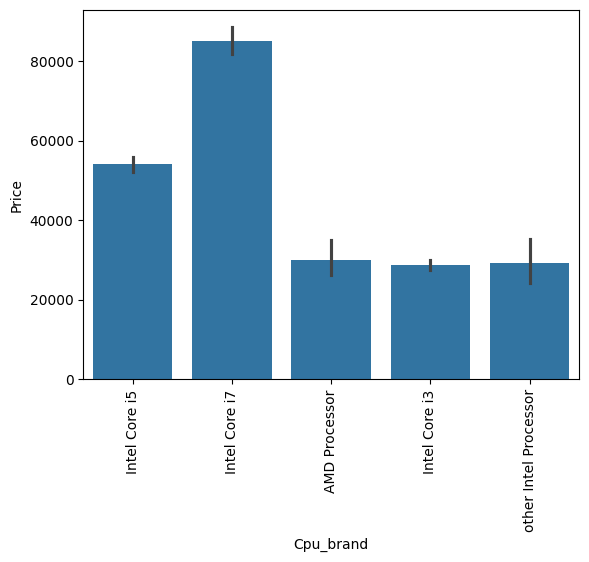

In [164]:
sns.barplot(x=df["Cpu_brand"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [165]:
df.drop(columns=["Cpu","Cpu_name"],inplace=True)

In [166]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


#RAM

In [167]:
df["Ram"] = df["Ram"].str.replace("GB", "").astype("int32")

<Axes: xlabel='Ram'>

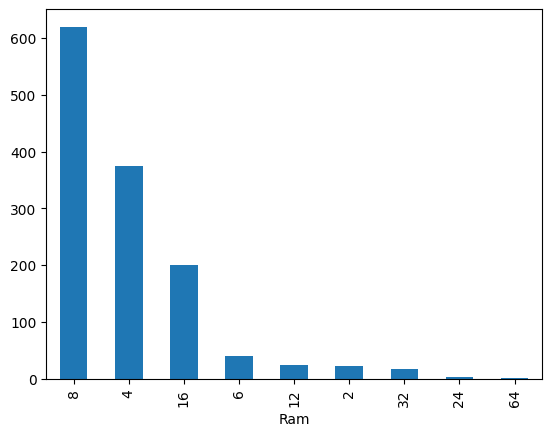

In [168]:
df["Ram"].value_counts().plot(kind="bar")

<Axes: xlabel='Ram', ylabel='Price'>

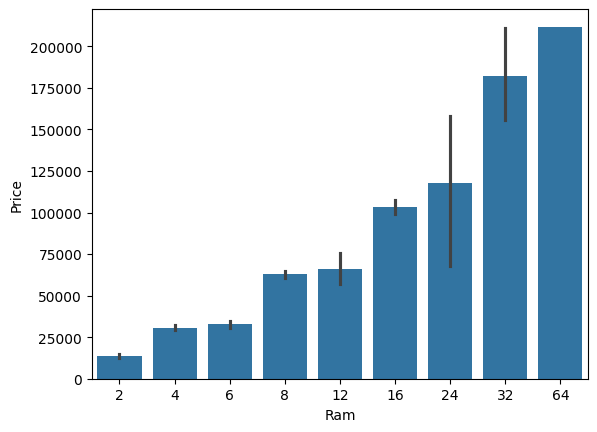

In [169]:
sns.barplot(x=df["Ram"],y=df["Price"])

# MEMORY

In [170]:
df["Memory"].sample(5)

,Memory
507,1TB HDD
896,1TB HDD
402,256GB SSD + 1TB HDD
646,256GB SSD
723,1TB SSD + 1TB HDD


In [171]:
df["Memory"].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [172]:
#standardize text
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [173]:
#splitting drives
new = df["Memory"].str.split("+", n=1, expand=True)

df["first"] = new[0].str.strip()
df["second"] = new[1]


In [174]:
df["second"].value_counts()

,count
second,
1000 HDD,185
2000 HDD,15
256 SSD,3
500 HDD,2
1000 Hybrid,2
512 SSD,1


In [175]:
df["first"]

,first
0,128 SSD
1,128 Flash Storage
2,256 SSD
3,512 SSD
4,256 SSD
...,...
1298,128 SSD
1299,512 SSD
1300,64 Flash Storage
1301,1000 HDD


In [176]:
# indicator columns for what type of drive appears in the first slot
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [177]:
#  clean the string and keep only digits

df["first"] = df["first"].str.replace(r'\D', '', regex=True)

In [178]:
# Handle second drive
df["second"]=df["second"].fillna("0")
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [179]:
df["second"] = df["second"].str.replace(r'\D', '', regex=True)

In [180]:
df["first"]

,first
0,128
1,128
2,256
3,512
4,256
...,...
1298,128
1299,512
1300,64
1301,1000


In [181]:
df["second"]

,second
0,0
1,0
2,0
3,0
4,0
...,...
1298,0
1299,0
1300,0
1301,0


In [182]:
#convert to integers

df["second"] = df["second"].astype(int)
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
# Now both first and second are numeric sizes (in GB)

In [183]:
# Multiplies the numeric size by the type flag to assign sizes correctly

df["HDD"] = (df["first"]*df["Layer1HDD"] + df["second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"] + df["second"]*df["Layer2SSD"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"] + df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"]*df["Layer1Flash_Storage"] + df["second"]*df["Layer2Flash_Storage"])


In [184]:
# Clean up temporary columns

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)


In [185]:
df.sample()



,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
1037,Toshiba,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.47,91908.0,0,1,157.350512,Intel Core i7,0,256,0,0


In [186]:
df.drop(columns=["Memory"],inplace=True)

In [187]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [188]:
df.corr(numeric_only=True)["Price"]

,Price
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
IPS,0.252208
PPI,0.473487
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
Flash_Storage,-0.040511


In [189]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [190]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# GPU

In [191]:
df["Gpu"].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [192]:
df["Gpu brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [193]:
df["Gpu brand"].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [194]:
#filter ARM  out

df = df[df["Gpu brand"] != "ARM"]


<Axes: xlabel='Gpu brand', ylabel='Price'>

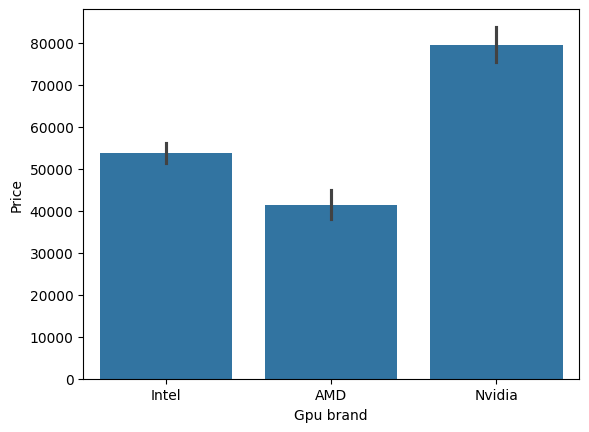

In [195]:
sns.barplot(x=df["Gpu brand"],y=df["Price"])

In [196]:
df.drop(columns=["Gpu"],inplace=True)

# OPERATING SYSTEM

In [197]:
df["OpSys"].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [198]:
def cat_os(inp):
  if inp== "Windows 10" or inp=="Windows 7" or inp=="Windows 10 S":
    return "Windows"
  elif inp=="macOS" or inp=="Mac OS X":
    return "Mac"
  else:
    return "Others/No OS/Linux"



In [199]:
df["OS"]=df["OpSys"].apply(cat_os)

In [200]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [201]:
df.drop(columns=["OpSys"],inplace=True)

In [202]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='OS', ylabel='Price'>

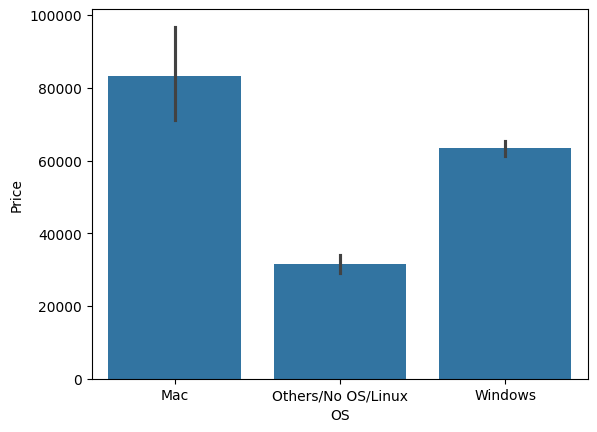

In [203]:
sns.barplot(x=df["OS"],y=df["Price"])

# WEIGHT

<Axes: xlabel='Weight', ylabel='Count'>

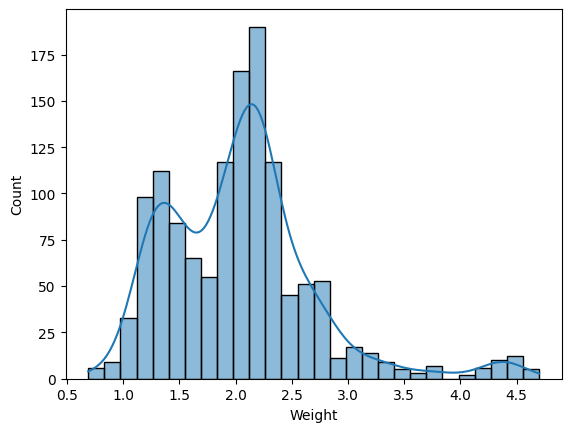

In [204]:
sns.histplot(df["Weight"],kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

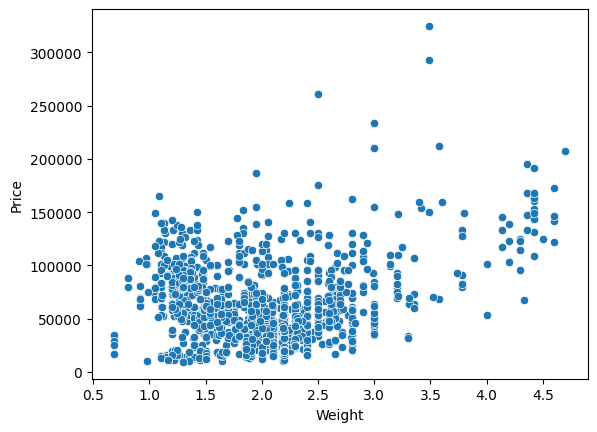

In [205]:
sns.scatterplot(x=df["Weight"],y=df["Price"])

In [206]:
df.corr(numeric_only=True)["Price"]

,Price
Ram,0.742905
Weight,0.209867
Price,1.000000
Touchscreen,0.192917
IPS,0.253320
PPI,0.475368
HDD,-0.096891
SSD,0.670660


<Axes: >

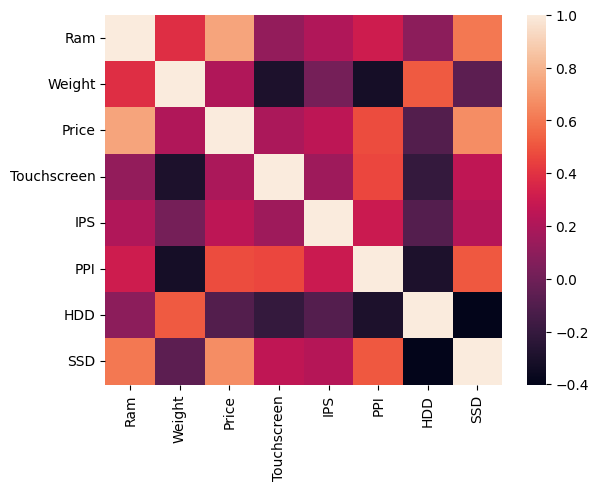

In [207]:
sns.heatmap(df.corr(numeric_only=True))

#Price---Target column

<Axes: xlabel='Price', ylabel='Count'>

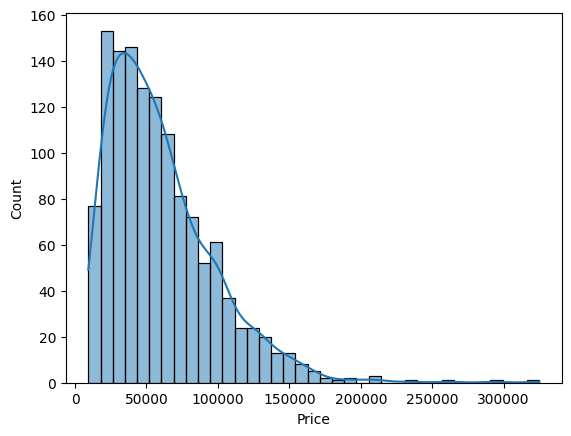

In [208]:
sns.histplot(df["Price"],kde=True)

<Axes: xlabel='Price', ylabel='Count'>

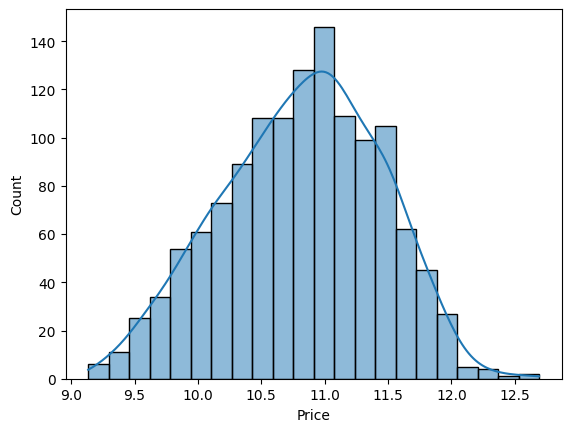

In [209]:
# applying a log transformation on the Price column
sns.histplot(np.log(df["Price"]),kde=True)

#SEPERATING  X AND Y COLUMNS

In [210]:
x=df.drop(columns=["Price"])
y=np.log(df["Price"])

In [211]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [212]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


# TRAIN TEST SPLIT

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [214]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu_brand,HDD,SSD,Gpu brand,OS
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


to handle categorical columns ---one hot encoding

#COLUMN TRANSFORMER

In [215]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [216]:
step1=ColumnTransformer(transformers=[("col_tf",OneHotEncoder(sparse_output=False,drop="first"),[0,1,7,10,11])])

In [217]:
step2=LinearRegression()

In [218]:
pipe=Pipeline([("step1",step1),("step2",step2)])

In [219]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(transformers=[('col_tf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [220]:
y_pred=pipe.predict(x_test)



---



---


# LINEAR REGRESSION

In [221]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("r2_score:",r2_score(y_test,y_pred))

MAE: 0.27095710153520836
r2_score: 0.6930423923521785


In [222]:
np.exp(0.27) # price diff

np.float64(1.3099644507332473)

e
0.27
≈1.31

The predicted prices are, on average, about 31% higher or lower than the actual prices.

#



---


#RIDGE REGRESSION

In [223]:
step1 = ColumnTransformer(transformers=[
    ('col_tf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('LR R2 score:',r2_score(y_test,y_pred))
print('LR MAE:',mean_absolute_error(y_test,y_pred))

LR R2 score: 0.812733103131181
LR MAE: 0.20926802242582962





---


# LASSO REGRESSION

In [224]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('LASSO R2 score:',r2_score(y_test,y_pred))
print('LASSO MAE:',mean_absolute_error(y_test,y_pred))

LASSO R2 score: 0.8071853945317105
LASSO MAE: 0.21114361613472565




---


# Cross-validation

#K-FOLD CV

Instead of relying on a single train-test split, use K-Fold CV

It trains on different folds and averages the results → gives a more reliable estimate.

In [225]:
from sklearn.model_selection import cross_val_score

# Assuming 'step1' is your defined ColumnTransformer
# Ridge example
ridge = Ridge(alpha=10)
step1.fit(x_train)
ridge_cv = cross_val_score(ridge, step1.transform(x_train), y_train,
                           cv=5, scoring='r2')

print("Ridge CV R2 scores:", ridge_cv)
print("Average Ridge R2:", ridge_cv.mean())

# Lasso example
lasso = Lasso(alpha=0.001)
lasso_cv = cross_val_score(lasso, step1.transform(x_train), y_train,
                           cv=5, scoring='r2')

print("\nLasso CV R2 scores:", lasso_cv)
print("Average Lasso R2:", lasso_cv.mean())

Ridge CV R2 scores: [0.74782373 0.83145249 0.84016227 0.81256706 0.8061282 ]
Average Ridge R2: 0.8076267496774061

Lasso CV R2 scores: [0.74655962 0.83590591 0.84496579 0.8130262  0.80558849]
Average Lasso R2: 0.8092092022934734




---



# Hyperparameter tuning with GridSearchCV

Instead of fixing alpha, let the model find the best one.

# GSV

GridSearchCV → it tries multiple values of alpha for Ridge and Lasso, performs 5-fold cross-validation, and picks the best value.

Searches 6 values of alpha (0.001 → 100)

Runs 5-fold CV for each alpha

Trains Ridge regression on preprocessed data (step1.fit_transform(x_train))

Finds the best alpha and best R² score

In [226]:
from sklearn.model_selection import GridSearchCV

# Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(step1.fit_transform(x_train), y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R2:", ridge_grid.best_score_)

# Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(step1.fit_transform(x_train), y_train)

print("\nBest Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso R2:", lasso_grid.best_score_)


Best Ridge alpha: {'alpha': 0.001}
Best Ridge R2: 0.8178998784098871

Best Lasso alpha: {'alpha': 0.001}
Best Lasso R2: 0.8092092022934734




---



🔹 ✅ Rule of Thumb

Use CV when:

You want to evaluate a fixed model.

You’re comparing different models’ performance.

Use GSV when:

You want to optimize hyperparameters.

You’re unsure what α, C, depth, etc. to use.

###Evaluate Best Models on Test Set

### Best Ridge model

In [229]:

best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(step1.transform(x_test))

print("\nRidge Regression (Best Model)")
print("Test R²:", r2_score(y_test, ridge_pred))
print("Test MAE:", mean_absolute_error(y_test, ridge_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))


Ridge Regression (Best Model)
Test R²: 0.8073312089197606
Test MAE: 0.2101770823676328
Test RMSE: 0.2714878666966319


### Best Lasso model

In [230]:
best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(step1.transform(x_test))

print("\n Lasso Regression (Best Model)")
print("Test R²:", r2_score(y_test, lasso_pred))
print("Test MAE:", mean_absolute_error(y_test, lasso_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, lasso_pred)))


 Lasso Regression (Best Model)
Test R²: 0.8071853945317105
Test MAE: 0.21114361613472565
Test RMSE: 0.27159058014023346




---



---



# **RESULTS**:



---



---



###**Train/Test Results**

####* Linear Regression (no regularization)

R² = 0.813

MAE = 0.209

####* Lasso regression(α=0.001)

Test R²: 0.8071853945317105

Test MAE: 0.21114361613472565

Test RMSE: 0.27159058014023346


###* Ridge Regression (Best Model)

Test R²: 0.8073312089197606

Test MAE: 0.2101770823676328

Test RMSE: 0.2714878666966319

# INTERPRETATION:

Linear Regression (baseline) actually performed best with R² = 0.813 and the lowest MAE.

Ridge and Lasso gave very similar performance (R² ≈ 0.807), with only minor differences in MAE and RMSE.

The lack of significant improvement from regularization suggests that multicollinearity is not a serious issue in this dataset.

Lasso is still useful since it can shrink less important features toward zero, improving interpretability.



---

# 📌CONCLUSION :

A simple Linear Regression model is sufficient for this dataset after log transformation. Ridge and Lasso don’t add much predictive power but can be valuable if model simplicity or feature selection is a priority.